In [19]:
# Initialize Otter
import otter
grader = otter.Notebook("lab_ass01_2024.ipynb")

# Computer Assignment 1

***
**Task 1**:  Simple plotting of signals
***

Write a general function that will generate values from a finite-length sinusoid of the form
$$
  x[n] = A \cos(\omega_0 n + \phi) 
$$
The function will need four input arguments: three for the parameters (scalar floats $A$, $\omega_0$, and $\phi$), and one vector containing the values of $n$ for which $x[n]$ must be calculated. The function should take the form

> `xv = getcosinevals(A, w0, phi, nv)`

With the obvious correspondence between parameters and variables. 

Test the function by generating and plotting values of the signal
$$
  x_1[n] = 2 \cos \left( \frac{2\pi}{12} n + \frac{\pi}{4} \right)
$$
over the range $-10$ to $15$.  The horizontal axis should extend only over the range indicated, and the axes should be labelled accordingly.  Each signal should be displayed using a stem plot since it's a discrete signal.

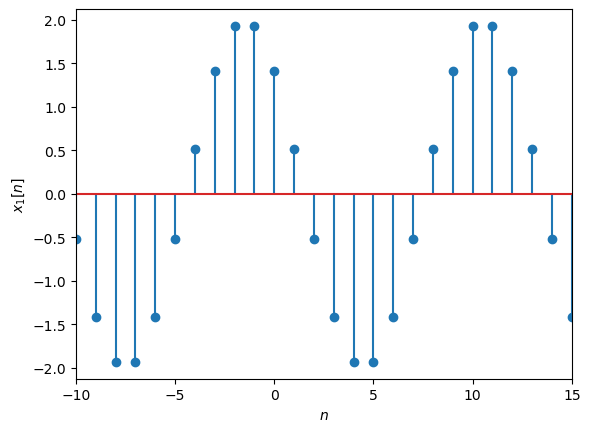

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def getcosinevals(A, w0, phi, nv):
    xv = A*np.cos(w0*nv+phi);
    return xv


A = 2;
w0 = 2*np.pi/12;
phi = np.pi/4;
n1v = np.arange(-10,15+1,1);

x1v = getcosinevals(A, w0, phi, n1v)

# Stem plot with labels
plt.stem(n1v, x1v)
plt.xlabel('$n$')
plt.ylabel('$x_1[n]$')

# Make axes a bit prettier
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)

In [21]:
grader.check("lab_ass01_q1a")

lab_ass01_q1a results: All test cases passed!
lab_ass01_q1a - 1 message: len(n1v) returns correct length
lab_ass01_q1a - 2 message: x1v has same shape as n1v

***
**Task 2**:  Simple filtering, with input and output plotted on same axes
***

A lowpass filter has an impulse response    
$$\begin{aligned}
  h[n] = \begin{cases}
    \frac{1}{7} \qquad & 0 \leq n \leq 6 \\
    0 \qquad & \text{otherwise}.
  \end{cases}
\end{aligned}$$
Suppose the input to the filter is the (one-sided) sinusoidal sequence $$x[n] = u[n] \cos(\omega_0 n),$$ with $\omega_0 = \pi/10$, and the output is $y[n]$. Calculate and plot the input and output sequence on the same set of axes over the range $-10, \ldots, 70$.  Note that after the initial transient dies down, the output signal is also sinusoidal. What is the magnitude and phase of this output relative to the input?

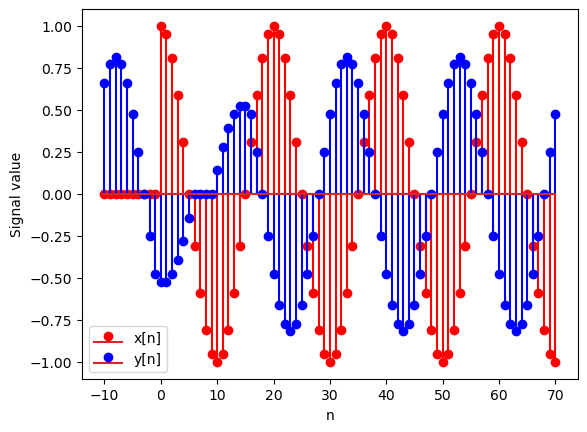

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# The block of code below should populate xv with the required x[n] values for each corresponding element of nv
n2v = np.arange(-10,71)  # vector of n values to consider
w0 = np.pi/10
def uv(n):
    u = [0]*len(n)
    a=0 # counter
    for i in n:
        u[a]= 0 if i<0 else 1
        a+=1
    return u
           
x2v = uv(n2v)*np.cos(w0*n2v);
plt.stem(n2v,x2v,linefmt='r');

# The block of code below should populate yv with the required y[n] values for each corresponding element of nv.
# Initially you should calculate these values using two nested for loops, but subsequently you can explore using
# numpy.convolve
def h1v(n):
    return 0 if n<0 or n>6 else 1/7

# y[n]= x[n]*h[n] = sum(h[k]x[n-k]) k ϵ [-infty, infty]
# k = [0,6] since h[k]=0 otherwise

y2v = np.empty(len(n2v), dtype=object) 

b=0 # counter 
for n in n2v:
    s=0
    for k in np.arange(0,7,1):
        s+=h1v(k)*x2v[n-k]
    y2v[b]=s;
    b+=1;

plt.stem(n2v,y2v,linefmt='b');

plt.xlabel("n")
plt.ylabel("Signal value")
plt.legend(["x[n]","y[n]"]);

In [23]:
grader.check("lab_ass01_q1b")

lab_ass01_q1b results: All test cases passed!
lab_ass01_q1b - 1 message: xv has same shape as nv
lab_ass01_q1b - 2 message: elements of xv are all zero where nv<0
lab_ass01_q1b - 3 message: y2v has same shape as n2v
lab_ass01_q1b - 4 message: elements of yv are all zero where nv<0

What is the magnitude and phase of this output relative to the input?

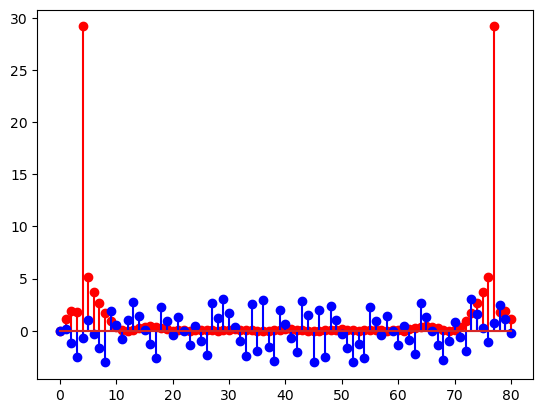

In [52]:
Y2V = np.fft.fft(y2v)
X2V = np.fft.fft(x2v)


plt.stem(np.abs(Y2V),linefmt='r');

#plt.plot(np.abs(Y2V))
plt.stem(np.angle(Y2V),linefmt='b');



***
**Task 3**:  Frequency response
***

Write a function that takes in a right-sided filter impulse response $h[n]$ and a set of frequencies $\omega$, and returns the corresponding values of $H(e^{j \omega})$.  The function declaration may look as follows:

> `Hv = freqresp(hv, wv)`

Here `hv` is a vector with $p$ elements specifying all the nonzero values of the impulse response, such that
`hv[0]`=$h[0]$, `hv[1]`=$h[1]$, and so on. The input `wv` is a vector of real-valued frequency values, and the output `Hv` must contain the complex frequency response values corresponding to the elements of `wv`.

Use this function to find the frequency response values of the moving average lowpass filter
$$\begin{aligned}
  h_3[n] = \begin{cases}
    \frac{1}{16} (n + 1) \qquad & 0 \leq n \leq 3 \\
    \frac{1}{16} (7 - n) \qquad & 4 \leq n \leq 6 \\
    0 \qquad & \text{otherwise}.
  \end{cases}
\end{aligned}$$
for a range of frequencies $\omega = 0, 0.01, \ldots, 4\pi$. Plot the magnitude `abs(H)` as a function of $\omega$. On a separate set of axes, plot the phase `angle(H)` as a function of $\omega$. Interpret the results you obtain, and note the periodicity of the frequency response. What effect will the system have on an input complex exponential with frequency $\omega = \pi/2$?

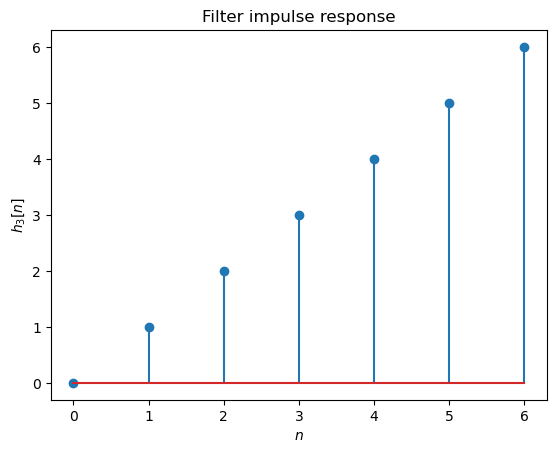

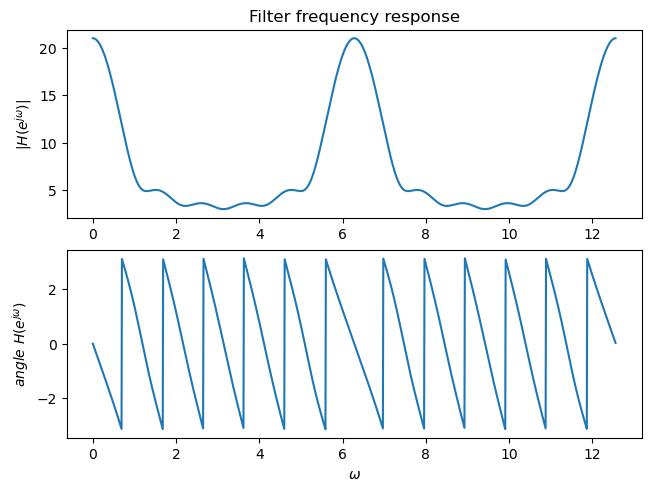

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def freqresp(hv, wv):
    Hv = np.zeros(wv.shape, dtype=np.cdouble)
    a = 0 # counter
    for w in wv:
        s=0
        kv = np.arange(0,len(hv),1)
        for k in kv:
            s+=hv[k]*np.exp(-1j*w*k)
        Hv[a]=s
        a+=1;
    return Hv
    
# The block below should generate the vector of values htv corresponding to the elements of nv

def h3(n):
    out=0
    if n>=0 and n<=3:
        out=(n+1)*1/16
    if n>=4 and n<=6:
        out=(7-n)*1/16
    return out

n3v = np.arange(0,7)
h3v = np.empty(len(n3v), dtype=object)

for i in np.arange(0,len(h3v),1): h3v[i]=n3v[i]
...

# Plot impulse response
plt.figure
plt.stem(n3v,h3v)
plt.xlabel('$n$')
plt.ylabel('$h_3[n]$')
ax = plt.gca()
ax.set_title('Filter impulse response')

# Vector of values of omega at which to calculate frequency response
w3v = np.arange(0, 4*np.pi, 0.01)

# Calculate frequency response values
H3v = freqresp(h3v, w3v)

# Plot frequency response
fig, axs = plt.subplots(2, 1, constrained_layout=True)

axs[0].plot(w3v, np.abs(H3v))
axs[0].set_title('Filter frequency response')
axs[0].set_ylabel('$|H(e^{j \omega})|$')

axs[1].plot(w3v, np.angle(H3v))
axs[1].set_xlabel('$\omega$')
axs[1].set_ylabel('$\t{angle}~H(e^{j \omega})$');

In [25]:
grader.check("lab_ass01_q1c")

lab_ass01_q1c results: All test cases passed!
lab_ass01_q1c - 1 message: h3v has same shape as n3v
lab_ass01_q1c - 2 message: H3v has same shape as w3v

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [26]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    lab_ass01_q1a results: All test cases passed!
    lab_ass01_q1a - 1 message: len(n1v) returns correct length
    lab_ass01_q1a - 2 message: x1v has same shape as n1v

    lab_ass01_q1b results: All test cases passed!
    lab_ass01_q1b - 1 message: xv has same shape as nv
    lab_ass01_q1b - 2 message: elements of xv are all zero where nv<0
    lab_ass01_q1b - 3 message: y2v has same shape as n2v
    lab_ass01_q1b - 4 message: elements of yv are all zero where nv<0

    lab_ass01_q1c results: All test cases passed!
    lab_ass01_q1c - 1 message: h3v has same shape as n3v
    lab_ass01_q1c - 2 message: H3v has same shape as w3v
